In [2]:
!pip install -U "tensorflow-text==2.15.*"
!pip install -U "tf-models-official==2.15.*"
!pip install tensorflow_text

  Using cached tf_models_official-2.15.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached sacrebleu-2.4.3-py3-none-any.whl.metadata (51 kB)
  Using cached seqeval-1.2.2.tar.gz (43 kB)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 5.6 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=855187f412b205e596ce1273c430d565f7ad3855df21895d86e9a579141131cb
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
#BERT Architecture

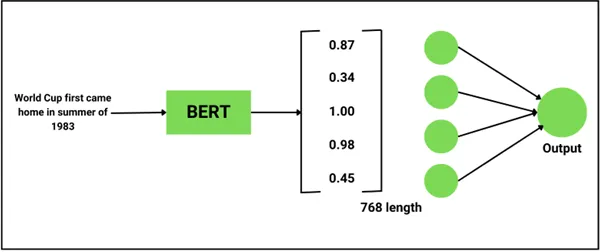

In [5]:
import pandas as pd

# reading csv file
df1 = pd.read_csv("mmdata.csv")
df1

,Review,Sentiment
0,ဟိုတယ် အစားအသောက် မကောင်း ပါ,negative
1,အခန်းတွင်း ညစ်ပတ် သည်,negative
2,ဝန်ဆောင်မှု ညံ့ဖျင်း သည်,negative
3,ဆူညံ သည်,negative
4,လေကောင်း လေသန့် ရသည်,positive
5,အခန်း ကျယ်ဝန်း သည်,positive
6,wifi ရပြီး အင်တာနတ် လိုင်း ကောင်းပါသည်,positive


In [6]:
#Explanatory Data Analysis
df1['Sentiment'].value_counts()


,count
Sentiment,
negative,4
positive,3


In [7]:
#Data Preprocessing
df1['Review_Sentiment']=df1['Sentiment'].apply(lambda x: 1 if x=='positive' else 0)
df1.sample(5)

,Review,Sentiment,Review_Sentiment
5,အခန်း ကျယ်ဝန်း သည်,positive,1
2,ဝန်ဆောင်မှု ညံ့ဖျင်း သည်,negative,0
3,ဆူညံ သည်,negative,0
6,wifi ရပြီး အင်တာနတ် လိုင်း ကောင်းပါသည်,positive,1
1,အခန်းတွင်း ညစ်ပတ် သည်,negative,0


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1['Sentiment'],df1['Review_Sentiment'], test_size=0.2)

In [9]:
#myanmar language
import tensorflow_text as text  # Registers the ops.
import tensorflow as tf
import tensorflow_hub as hub


bert_preprocessor = hub.KerasLayer('https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/multi-cased-preprocess/3')


In [10]:
bert_encoder = hub.KerasLayer('https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/multi-cased-l-12-h-768-a-12/4',
    trainable=True)


In [11]:
# Building the Model
#Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocessor(text_input)
outputs = bert_encoder(preprocessed_text)

In [12]:
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

In [13]:
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [15]:
#compling the model
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [16]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 42s 42s/step - loss: 0.6947 - accuracy: 0.4000 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 11s 11s/step - loss: 0.2024 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 3/10
1/1 [==============================] - 9s 9s/step - loss: 1.7224 - accuracy: 0.8000 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 10s 10s/step - loss: 1.2455 - accuracy: 0.2000 - precision: 0.2000 - recall: 1.0000
Epoch 5/10
1/1 [==============================] - 11s 11s/step - loss: 0.8354 - accuracy: 0.6000 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 10s 10s/step - loss: 0.5463 - accuracy: 0.8000 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 11s 11s/step - loss: 0.8876 - accuracy: 0.8000 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/10
1/1 [========

In [17]:
#model evaluate
model.evaluate(X_test, y_test)

1/1 [==============================] - 2s 2s/step - loss: 2.2381 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00


[2.2380807399749756, 0.0, 0.0, 0.0]

In [18]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

1/1 [==============================] - 2s 2s/step


In [19]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0])

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[0, 0],
       [2, 0]])

Text(50.722222222222214, 0.5, 'Truth')

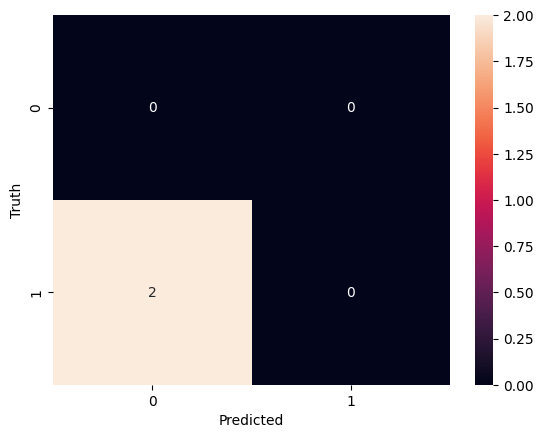

In [21]:
#Confusion matrix
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [23]:
 #Classifying
feedback = [
    '[ဟိုတယ် သည် အခန်းတွင်း ညစ်ပတ် ပြီး ဆူညံ သည်]',
    'သန့်ရှင်းမှု မရှိ ပါ',
    'အစားအသောက် မကောင်း သောကြောင့် နောက်ထပ် လာတည်းမည် မဟုတ်ပါ',

]

feedback_pred = model.predict(feedback)
feedback_pred = feedback_pred.flatten()

feedback_pred = np.where(feedback_pred > 0.5, 'positive', 'negative')
feedback_pred


1/1 [==============================] - 2s 2s/step


array(['negative', 'negative', 'negative'], dtype='<U8')